# <span style="color: #3498db;">CA1 Regression</span>

**<span style="color:rgb(255, 0, 195);">[AhmadReza Nopoush]</span> - <span style="color:rgb(255, 0, 195);">[610301194]</span>**

importing libraries...

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1

reading data

In [3]:
Data_1 = pd.read_csv("data1.csv")
Data_2 = pd.read_csv("data2.csv")

coefficient:  [ 7.32919986 -5.33324281]
data1 | Degree 1: MSE = 558.6030
coefficient:  [-13.19210169  -5.33324281   2.4137927 ]
data1 | Degree 2: MSE = 221.8050
coefficient:  [-13.19210169   0.25357034   2.4137927   -0.36512757]
data1 | Degree 3: MSE = 171.3027
coefficient:  [ 0.4147112   0.25357034 -2.92364761 -0.36512757  0.24422968]
data1 | Degree 4: MSE = 25.1613
coefficient:  [ 4.14711197e-01  6.06469162e-01 -2.92364761e+00 -4.29744981e-01
  2.44229677e-01  2.28153203e-03]
data1 | Degree 5: MSE = 25.0794


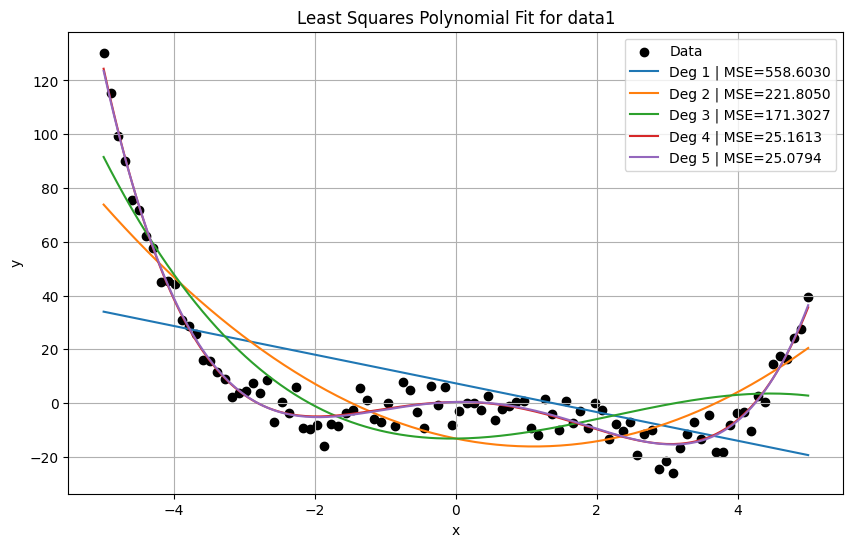

In [ ]:
x = Data_1.iloc[:, 0].values
y = Data_1.iloc[:, 1].values

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data", color="black")

x_lin = np.linspace(np.min(x), np.max(x), 200)

for d in range(1,6):
    A = np.vander(x, d+1, increasing=True)
    n = A.shape[1]
    L = np.zeros((n-1, n))
    for i in range(n-1):
        L[i, i] = 1
        L[i, i+1] = -1

    lambda_ = 0
    
    a = np.linalg.solve(A.T @ A + lambda_ * L.T @ L, A.T @ y)

    y_pred_train = A @ a
    mse = np.mean((y - y_pred_train) ** 2)
    
    y_pred = np.polyval(a[::-1], x_lin)

    plt.plot(x_lin, y_pred, label=f"Deg {d} | MSE={mse:.4f}")
    print("coefficient: ",a)
    print(f"data1 | Degree {d}: MSE = {mse:.4f}")

plt.legend()
plt.title(f"Least Squares Polynomial Fit for data1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

coefficient:  [12.740559    0.10256974]
data1 | Degree 1: MSE = 72.5928
coefficient:  [5.70138484e+00 1.02569740e-01 2.09074029e-03]
data1 | Degree 2: MSE = 32.9558
coefficient:  [ 5.70138484e+00 -4.43200766e-03  2.09074029e-03  1.76567681e-05]
data1 | Degree 3: MSE = 25.6148
coefficient:  [ 3.77101903e+00 -4.43200766e-03  4.00212185e-03  1.76567681e-05
 -2.20794109e-07]
data1 | Degree 4: MSE = 22.6713
coefficient:  [ 5.57979193e+00  3.07309226e-02  2.40364837e-04  1.40769601e-06
  8.96802077e-07  1.44808255e-09 -8.11605095e-11]
data1 | Degree 6: MSE = 19.7728
coefficient:  [ 6.43786558e+00 -1.88872234e-01 -3.02834161e-03  3.24806656e-04
  2.86717101e-06 -1.24653821e-07 -4.84557149e-10  1.79656197e-11
  3.17697052e-14 -8.44690876e-16 -7.75683521e-19]
data1 | Degree 10: MSE = 14.7908
coefficient:  [ 8.00501194e+00 -1.63870903e-01 -1.99720386e-02  1.65643204e-04
  3.22373676e-05  6.40993518e-08 -1.93296049e-08 -6.52222146e-11
  5.73400003e-12  1.57581855e-14 -8.79825370e-16 -1.52515229e-

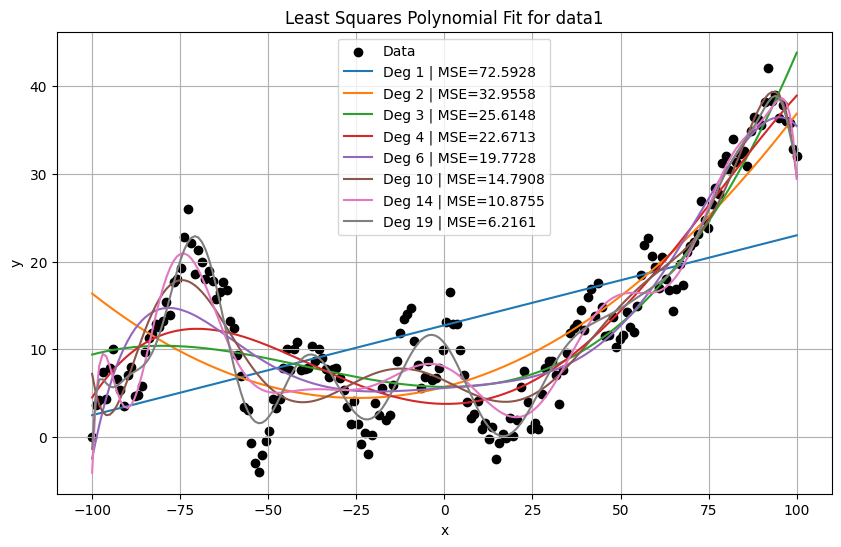

In [34]:
x = Data_2.iloc[:, 0].values
y = Data_2.iloc[:, 1].values

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data", color="black")

x_lin = np.linspace(np.min(x), np.max(x), 200)

for d in [1,2,3,4,6,10,14,19]:
    
    A = np.vander(x, d+1, increasing=True)
    n = A.shape[1]
    L = np.zeros((n-1, n))
    for i in range(n-1):
        L[i, i] = 1
        L[i, i+1] = -1

    lambda_ = 0
    
    a = np.linalg.solve(A.T @ A + lambda_ * L.T @ L, A.T @ y)

    y_pred_train = A @ a
    mse = np.mean((y - y_pred_train) ** 2)
    
    y_pred = np.polyval(a[::-1], x_lin)

    plt.plot(x_lin, y_pred, label=f"Deg {d} | MSE={mse:.4f}")
    print("coefficient: ",a)
    print(f"data1 | Degree {d}: MSE = {mse:.4f}")

plt.legend()
plt.title(f"Least Squares Polynomial Fit for data1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Part 2

at first we read data...

In [6]:
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568,135.0


seperating target from predicators

In [7]:
A_2 = dataset[dataset.columns[:-1]]
print(A_2.head())

b_2 = dataset["target"]
print("\nb:", b_2.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459840 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553511 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119218 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770658  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459840  0.082726  0.327890  0.171178   

         s4        s5        s6  
0 -0.054499  0.418551 -0.370989  
1 -0.830301 -1.436551 -1.938479  
2 -0.054499  0.060207 -0.545154  
3  0.721302  0.477072 -0.196823  
4 -0.054499 -0.672582 -0.980568  

b: 0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


doing for different labmdas

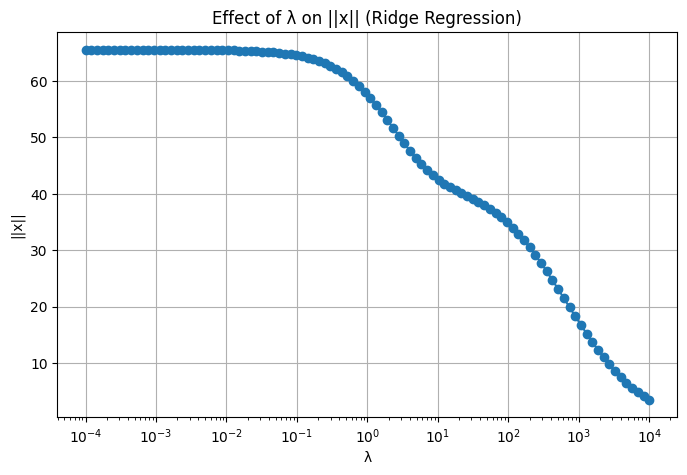

In [22]:
lambdas = np.logspace(-4, 4, 100)
solutions = []

for l in lambdas:
    X_rls = np.linalg.solve(A_2.T @ A_2 + l*np.eye(len(A_2.T)), A_2.T @ b_2)
    solutions.append(X_rls)

norms = [np.linalg.norm(x) for x in solutions]
plt.figure(figsize=(8, 5))
plt.plot(lambdas, norms, marker='o')
plt.xscale("log")
plt.title("Effect of λ on ||x|| (Ridge Regression)")
plt.xlabel("λ")
plt.ylabel("||x||")
plt.grid(True)
plt.show()


#### Key Observations
- **Behavior of λ**:
  - **λ → 0**: Approaches ordinary least squares (OLS), risking overfitting
  - **λ → ∞**: Forces all coefficients toward zero, causing underfitting
  - **Optimal λ**: Balances bias-variance tradeoff (find via cross-validation)

**Interpretation**:  
As λ increases, coefficients shrink toward zero at different rates. The optimal λ minimizes validation error.


#### Why Use Ridge Regression?

**Advantages Over OLS**
| Scenario | OLS Problem | Ridge Solution |
|----------|-------------|----------------|
| Multicollinearity | Unstable coefficients | Stable estimates |
| High-dimensional data | Overfitting | Regularized solutions |
| Correlated features | Large variance | Smooth shrinkage |

#### When to Prefer Ridge
- ✔️ Features are **correlated**
- ✔️ More features than samples (`p > n`)
- ✔️ Prioritizing model **stability** over interpretability


#### Comparison: Ridge vs. Lasso vs. Elastic Net

**Method Comparison Table**
| Method | Regularization | Sparsity | Best For |
|--------|---------------|----------|----------|
| **Ridge** | L2 (‖x‖²) | No | Correlated features |
| **Lasso** | L1 (‖x‖₁) | Yes | Feature selection |
| **Elastic Net** | L1 + L2 | Partial | High-dimensional data |

## Part 3

$$ \min_x \frac{1}{n} (Ax - b)^T W (Ax - b) = \frac{1}{n}[(Ax)^T W Ax + b^T W b -b^T W Ax - (Ax)^T W b] = $$
$$ = \frac{1}{n}[x^T A^T W Ax -2 b^T W Ax + b^T W b] \Rightarrow  $$
$$ (A^T W A)x_L  = A^T W^T b \Rightarrow x_L = (A^T W A)^{-1} A^T W^T b $$

In [12]:
california = pd.read_csv("california_housing.csv")
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


In [15]:
A_3 = california[california.columns[:-1]]
print(A_3)

b_3 = california["target"]
print("\nb:", b_3)

n = len(A_3)

         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597   
1      2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512   
2      1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843   
3      0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329   
4     -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616   
...         ...       ...       ...        ...         ...       ...   
20635 -1.216128 -0.289187 -0.155023   0.077354   -0.512592 -0.049110   
20636 -0.691593 -0.845393  0.276881   0.462365   -0.944405  0.005021   
20637 -1.142593 -0.924851 -0.090318   0.049414   -0.369537 -0.071735   
20638 -1.054583 -0.845393 -0.040211   0.158778   -0.604429 -0.091225   
20639 -0.780129 -1.004309 -0.070443   0.138403   -0.033977 -0.043682   

       Latitude  Longitude  
0      1.052548  -1.327835  
1      1.043185  -1.322844  
2      1.038503  -1.332827  
3      1.038503  -1

#### A.

In [16]:
vectors_a = []

for _ in range(100):
    w_uniform = np.random.uniform(low=0.5, high=4, size=n)
    W = np.diag(w_uniform)

    X = np.linalg.solve(A_3.T @ W @ A_3, A_3.T @ W.T @ b_3)

    vectors_a. append(X)

X_a = np.stack(vectors_a, axis=0)
mean_Xa = np.mean(X_a, axis=0)
mean_Xa

array([ 0.83274769,  0.11749821, -0.27538987,  0.31152441, -0.005645  ,
       -0.04557544, -0.89869578, -0.8689861 ])

#### B.

In [17]:
vectors_b = []

for _ in range(100):
    counts = np.random.multinomial(n, pvals=[1/n]*n, size=1)[0]
    w_multinomial = counts / n
    W = np.diag(w_multinomial)

    X = np.linalg.solve(A_3.T @ W @ A_3, A_3.T @ W.T @ b_3)
    

    vectors_b. append(X)

X_b = np.stack(vectors_b, axis=0)
mean_Xb = np.mean(X_b, axis=0)
mean_Xb

array([ 0.83566855,  0.11954228, -0.28596153,  0.32643777, -0.0024534 ,
       -0.11823275, -0.89328585, -0.86348367])

#### C.

In [18]:
vectors_c = []

for _ in range(100):
    w_dirichlet = np.random.dirichlet(alpha=np.ones(n), size=1)[0]
    W = np.diag(w_dirichlet)

    X = np.linalg.solve(A_3.T @ W @ A_3, A_3.T @ W.T @ b_3)

    vectors_c. append(X)

X_c = np.stack(vectors_c, axis=0)
mean_Xc = np.mean(X_c, axis=0)
mean_Xc

array([ 0.83241294,  0.11898193, -0.27758068,  0.31576342, -0.00500168,
       -0.05935855, -0.89371984, -0.86404774])

as we can see the vectors is similiar to another

In [20]:
print("X_a", mean_Xa)
print("X_b", mean_Xb)
print("X_c", mean_Xc)

X_a [ 0.83274769  0.11749821 -0.27538987  0.31152441 -0.005645   -0.04557544
 -0.89869578 -0.8689861 ]
X_b [ 0.83566855  0.11954228 -0.28596153  0.32643777 -0.0024534  -0.11823275
 -0.89328585 -0.86348367]
X_c [ 0.83241294  0.11898193 -0.27758068  0.31576342 -0.00500168 -0.05935855
 -0.89371984 -0.86404774]


In [21]:
dist_a_b = np.linalg.norm(X_a - X_b)  # Uniform vs. Multinomial
dist_a_c = np.linalg.norm(X_a - X_c)  # Uniform vs. Dirichlet
dist_b_c = np.linalg.norm(X_b - X_c)  # Multinomial vs. Dirichlet

print(f"Distance (a vs. b): {dist_a_b:.6f}")
print(f"Distance (a vs. c): {dist_a_c:.6f}")
print(f"Distance (b vs. c): {dist_b_c:.6f}")

Distance (a vs. b): 3.276656
Distance (a vs. c): 1.230561
Distance (b vs. c): 3.390693


#### ** Similarity Between Vectors**
```python
dist_a_b = 3.276656  # Uniform (a) vs. Multinomial (b)
dist_a_c = 1.230561  # Uniform (a) vs. Dirichlet (c)
dist_b_c = 3.390693  # Multinomial (b) vs. Dirichlet (c)
```
- **Uniform (a) and Dirichlet (c)** are nearly identical.  
- **Multinomial (b)** shows larger deviations.  

#### **3. Stability Ranking**
1. **Dirichlet (c)**: Most stable (smooth weights).  
2. **Uniform (a)**: Slightly noisier but consistent.  
3. **Multinomial (b)**: Least stable (sparse weights risk overfitting).  

#### **4. Theoretical Confirmation**
- Results align with expectations:  
  - Dirichlet and Uniform → Robust to noise.  
  - Multinomial → Sensitive to weight spikiness.  